In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])

In [6]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
filt = miami_df[miami_df['sqft'].str.contains('nan')]
miami_df.drop(index = filt.index, inplace = True)

miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])

miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 1832
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  616 non-null    object 
 1   br            616 non-null    int64  
 2   ba            616 non-null    float64
 3   sqft          616 non-null    float64
 4   housingType   616 non-null    object 
 5   laundry       616 non-null    object 
 6   parking       616 non-null    object 
 7   cats          616 non-null    object 
 8   dogs          616 non-null    object 
 9   furnished     616 non-null    object 
 10  rent          616 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 57.8+ KB


In [7]:
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 1832
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  616 non-null    object 
 1   br            616 non-null    int64  
 2   ba            616 non-null    float64
 3   sqft          616 non-null    float64
 4   housingType   616 non-null    object 
 5   laundry       616 non-null    object 
 6   parking       616 non-null    object 
 7   cats          616 non-null    object 
 8   dogs          616 non-null    object 
 9   furnished     616 non-null    object 
 10  rent          616 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 57.8+ KB


## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [8]:
X = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X.head()

(616, 64) (616, 1)


,br,ba,sqft,neighborhood_Allapattah,neighborhood_Aventura,neighborhood_Beverly Terrace,neighborhood_Boca Raton,neighborhood_Brickell,neighborhood_Brownsville,neighborhood_Coconut Grove,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
2,2,2.0,1106.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
9,1,1.0,600.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
10,3,3.0,1553.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
14,2,2.0,1190.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
16,2,2.0,1180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [9]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

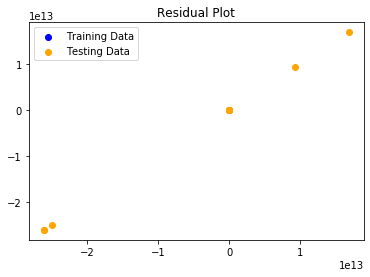

In [11]:
# Fit the Model to the scaled training data and make predictions using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.52483331012186e+25, R2: -1.5222414978664484e+25


In [13]:
y_train_scaled

array([[-0.7850932 ],
       [-1.02454728],
       [-0.58917623],
       [-0.89393596],
       [ 0.06388033],
       [ 0.1727231 ],
       [ 2.34957832],
       [ 2.4039997 ],
       [ 0.1727231 ],
       [-0.26264795],
       [ 1.69652175],
       [ 1.91420727],
       [-0.26264795],
       [-1.14971645],
       [ 0.82577966],
       [ 2.24073556],
       [-0.48033347],
       [-0.04496243],
       [-0.26264795],
       [-0.09938381],
       [ 1.11530141],
       [-0.15380519],
       [-0.91570452],
       [-0.80686175],
       [-1.29665418],
       [-0.32251147],
       [-0.21802242],
       [-0.37149071],
       [-0.80686175],
       [ 0.55367276],
       [ 1.69652175],
       [ 0.06388033],
       [-1.02454728],
       [-0.64359761],
       [ 0.7169369 ],
       [-1.13339004],
       [-0.69801899],
       [ 1.06958745],
       [-1.18781142],
       [-0.69801899],
       [ 0.11830172],
       [-0.94835734],
       [-0.59461837],
       [-1.07896866],
       [ 0.60809414],
       [-0

In [14]:
y_scaler.inverse_transform(predictions)

array([[ 3.01900265e+03],
       [ 2.67604609e+03],
       [ 2.55782993e+03],
       [ 2.07670100e+03],
       [ 2.01344676e+03],
       [ 2.53136184e+03],
       [ 3.04412490e+03],
       [ 3.79488342e+03],
       [ 1.66643868e+03],
       [ 3.46560251e+03],
       [ 1.14493471e+03],
       [ 1.55406849e+03],
       [ 2.64665502e+03],
       [ 2.35774915e+03],
       [ 3.28413210e+03],
       [ 3.98509474e+03],
       [ 2.58497794e+03],
       [ 2.53898824e+03],
       [ 2.72336761e+03],
       [ 1.32751963e+03],
       [ 2.51544314e+03],
       [ 3.35994746e+03],
       [ 1.95399872e+03],
       [ 3.73118057e+03],
       [ 3.53917481e+03],
       [ 1.87055696e+03],
       [ 3.45639896e+03],
       [ 3.12666943e+03],
       [ 3.12106880e+03],
       [ 3.49542817e+03],
       [ 3.00308395e+03],
       [ 3.40615446e+03],
       [ 2.80434901e+03],
       [ 2.37120750e+03],
       [ 4.69614412e+03],
       [ 2.03923492e+03],
       [ 2.83193161e+03],
       [-2.39385263e+16],
       [ 9.3